In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('input/train.csv',dtype={'WindSpeed': 'object'})
tr = train.copy()

In [3]:
map_abbr = {'ARI': 'ARZ', 'BAL': 'BLT', 'CLE': 'CLV', 'HOU': 'HST'}
def map_abb(a):
    global map_abbr
    if a in map_abbr.keys():
        return map_abbr[a]
    else:
        return a
    
train['PossessionTeam'] = train['PossessionTeam'].map(map_abb)
train['HomeTeamAbbr'] = train['HomeTeamAbbr'].map(map_abb)
train['VisitorTeamAbbr'] = train['VisitorTeamAbbr'].map(map_abb)

In [4]:
train['OffenseFormation'] = train['OffenseFormation'].replace([np.nan, 'EMPTY'], 'NAN')

In [5]:
train['DefendersInTheBox'] = train['DefendersInTheBox'].replace(np.nan, 0)

In [6]:
train['PlayerHeight'] = train['PlayerHeight'].apply(lambda x: 12*int(x.split('-')[0])+int(x.split('-')[1]))

In [7]:
# train['PlayerHeight'] = train['PlayerHeight'] * 2.54

In [8]:
# cross validation 필요
stadium = {
    'Gillette Stadium': ['Gillette Stadium'],
    'New Era Field': '',
    'Soldier Field': '',
    'Paul Brown Stadium': 'Paul Brown Stdium',
    'First Energy': ['First Energy Stadium', 'FirstEnergy Stadium', 'FirstEnergyStadium','FirstEnergy' ],
    'Ford Field': '', 
    'NRG Stadium': 'NRG',
    'Nissan Stadium': '',
    'Fedex Field': 'FedexField',
    'LA Memorial': ['Los Angeles Memorial Coliseum', 'Los Angeles Memorial Coliesum'],
    'Lambeau Field': 'Lambeau field',
    'Levis Stadium': '',
    'AT&T Stadium': '',
    'U.S. Bank Stadium': '',
    'M&T Bank Stadium': ['M&T Stadium', 'M & T Bank Stadium'],
    'BoA Stadium': ['Bank of America Stadium'],
    'Lucas Oil Stadium': '',
    'Arrowhead Stadium': '',
    'Mercedes-Benz Dome': ['Mercedes-Benz Superdome', 'Mercedes-Benz Dome', 'Mercedes-Benz Stadium'],
    'Heinz Field': '',
    'Raymond James Stadium': '',
    'StubHub Center': '',
    'Oakland-Alameda County Coliseum': 'Oakland Alameda-County Coliseum',
    'CenturyLink Field': ['CenturyLink', 'CenturyField'],
    'MetLife Stadium': ['MetLife', 'Metlife Stadium'],
    'Wembley Stadium': '',
    'Lincoln Financial Field': '',
    'Hard Rock Stadium': '',
    'State Farm Stadium': ['University of Phoenix Stadium'],
    'TIAA Bank Field': ['Everbank Field', 'EverBank Field'],
    'Estadio Azteca': '',
    'Empower Field': ['Broncos Stadium At Mile High', 'Broncos Stadium at Mile High', 'Sports Authority MA', 'Sports Authority Field at Mile High'],
    'Twickenham': 'Twickenham Stadium'
}

def stadium_map(a):
    global stadium
    for i in range(len(stadium)):
        if a in stadium[list(stadium.keys())[i]]:
            return list(stadium.keys())[i]
            break
    else:
        return a
    
train['Stadium'] = train['Stadium'].map(stadium_map)

In [9]:
print(sorted(train['Stadium'].unique()))
print()
print(sorted(list(stadium.keys())))

['AT&T Stadium', 'Arrowhead Stadium', 'BoA Stadium', 'CenturyLink Field', 'Empower Field', 'Estadio Azteca', 'FedExField', 'First Energy', 'Ford Field', 'Gillette Stadium', 'Hard Rock Stadium', 'Heinz Field', 'LA Memorial', 'Lambeau Field', 'Levis Stadium', 'Lincoln Financial Field', 'Lucas Oil Stadium', 'M&T Bank Stadium', 'Mercedes-Benz Dome', 'MetLife Stadium', 'NRG Stadium', 'New Era Field', 'Nissan Stadium', 'Oakland-Alameda County Coliseum', 'Paul Brown Stadium', 'Raymond James Stadium', 'Soldier Field', 'State Farm Stadium', 'StubHub Center', 'TIAA Bank Field', 'Twickenham', 'U.S. Bank Stadium', 'Wembley Stadium']

['AT&T Stadium', 'Arrowhead Stadium', 'BoA Stadium', 'CenturyLink Field', 'Empower Field', 'Estadio Azteca', 'Fedex Field', 'First Energy', 'Ford Field', 'Gillette Stadium', 'Hard Rock Stadium', 'Heinz Field', 'LA Memorial', 'Lambeau Field', 'Levis Stadium', 'Lincoln Financial Field', 'Lucas Oil Stadium', 'M&T Bank Stadium', 'Mercedes-Benz Dome', 'MetLife Stadium', 'N

In [10]:
len(train['Stadium'].unique())
## 몇개 안됐나봄

33

In [11]:
len(stadium)

33

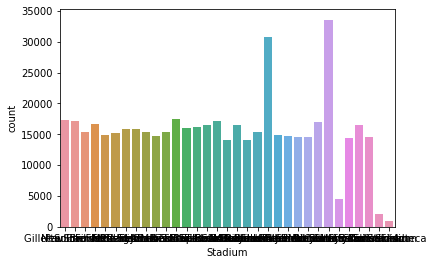

In [12]:
sns.countplot(train['Stadium'])

In [13]:
train['Stadium'].value_counts()

MetLife Stadium                    33572
Mercedes-Benz Dome                 30800
Levis Stadium                      17402
Gillette Stadium                   17248
New Era Field                      17204
M&T Bank Stadium                   17094
CenturyLink Field                  16962
Paul Brown Stadium                 16588
Lucas Oil Stadium                  16544
Empower Field                      16478
State Farm Stadium                 16434
U.S. Bank Stadium                  16170
AT&T Stadium                       15950
NRG Stadium                        15884
Nissan Stadium                     15862
FedExField                         15356
Arrowhead Stadium                  15334
Soldier Field                      15334
Lambeau Field                      15312
Ford Field                         15246
Heinz Field                        14850
First Energy                       14828
Raymond James Stadium              14696
LA Memorial                        14674
StubHub Center  

In [14]:
# stadium type 상의

In [15]:
turf = {
    'Field Turf': ['FieldTurf', 'FieldTurf 360', 'FieldTurf360', 'Field turf'],
    'A_Turf': '',
    'Grass': ['grass'],
    'UBU': ['UBU Sports Speed S5-M', 'UBU Speed Series-S5-M'],
    'Artificial': ['Artifical'],
    'DD': ['DD GrassMaster'],
    'Natural': ['Natural Grass', 'Natural grass', 'Natural', 'Naturall Grass', 'natural grass'],
    'SIS': ['SISGrass'],
    'Twenty-Four/Seven Turf':'',
}

def turf_map(a):
    global turf
    for i in range(len(turf)):
        if a in turf[list(turf.keys())[i]]:
            return list(turf.keys())[i]
    else:
        return a
    
train['Turf'] = train['Turf'].map(turf_map)

In [16]:
train['Turf'].unique()

array(['Field Turf', 'A-Turf Titan', 'Grass', 'UBU', 'Artificial', 'DD',
       'Natural', 'SIS', 'Twenty-Four/Seven Turf'], dtype=object)

In [17]:
def low(a):
    return a.lower()
train['WindSpeed'] = train['WindSpeed'].replace(np.nan, '0').map(low)

train['WindSpeed'] = train['WindSpeed'].replace([np.nan, 'calm', 'ssw', 'e', 'se'], '0')
train['WindSpeed'] = train['WindSpeed'].replace('mph', '')
train['WindSpeed'] = train['WindSpeed'].replace(' gusts up to ', '-')

def windspeed(a):
    if 'gusts up to' in a:
        a = a.replace('gusts up to', '-')
    elif 'mph' in a:
        a = a.replace('mph','')
    
    if '-' in a:
        x, y = a.split('-')
        a = (int(x)+int(y))/2
    

    try:
        return int(a)
    except:
        return a
    
train['WindSpeed'] = train['WindSpeed'].map(windspeed)

In [18]:
# train = tr.copy()

In [19]:
train['WindSpeed'].unique()

array([ 8,  6, 10,  9, 11,  0,  7,  5,  2, 12,  1,  3,  4, 13, 14, 15, 17,
       18, 16, 23, 24, 20, 22, 19], dtype=int64)

In [20]:
## location은 경기장으로 땡치기 가능?
## 날씨는 상의 후 작업
## 바람방향도 상의 후 작업

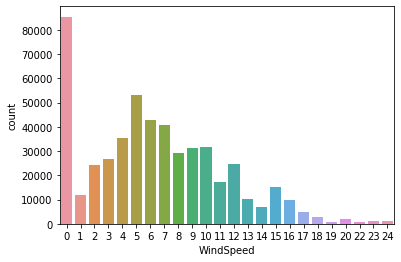

In [21]:
sns.countplot(train['WindSpeed'])

In [22]:
train.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerHeight,PlayerWeight,Week,Temperature,Humidity,WindSpeed
count,5.097620e+05,5.097620e+05,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509744.000000,509748.000000,5.097620e+05,...,509762.000000,5.097620e+05,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,461230.000000,503602.000000,509762.000000
mean,2.017594e+09,2.017594e+13,60.040304,26.783535,2.591912,1.683176,0.279406,180.247779,179.933859,2.344703e+06,...,9.501057,2.419204e+06,6.942126,4.212334,74.392777,253.554388,9.096370,60.436442,55.646062,6.418325
std,4.997098e+05,4.997098e+09,25.435261,7.238206,1.383601,0.976412,0.145482,104.298330,106.319488,6.418871e+05,...,9.366413,5.357783e+05,0.994210,6.436167,2.602712,48.367386,5.000984,17.570291,25.430976,4.825125
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,0.000000,2.340000e+02,0.000000,-14.000000,66.000000,153.000000,1.000000,9.000000,0.000000,0.000000
25%,2.017111e+09,2.017111e+13,39.090000,22.730000,1.500000,0.940000,0.170000,90.630000,89.830000,2.532865e+06,...,0.000000,2.540011e+06,6.000000,1.000000,72.000000,210.000000,5.000000,48.000000,43.000000,3.000000
50%,2.017123e+09,2.017123e+13,60.290000,26.790000,2.470000,1.540000,0.270000,179.700000,180.090000,2.543765e+06,...,7.000000,2.552582e+06,7.000000,3.000000,75.000000,245.000000,9.000000,62.000000,59.000000,6.000000
75%,2.018110e+09,2.018110e+13,80.970000,30.860000,3.560000,2.290000,0.390000,270.400000,270.190000,2.555343e+06,...,14.000000,2.557976e+06,8.000000,6.000000,76.000000,305.000000,14.000000,73.000000,71.000000,10.000000
max,2.018123e+09,2.018123e+13,116.840000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.561671e+06,...,51.000000,2.561468e+06,11.000000,99.000000,81.000000,380.000000,17.000000,97.000000,100.000000,24.000000


In [23]:
def stdtype(a):
#     if a == np.nan:
#         return 'NAN'
    a = a.lower()
    if ('ou' in a) or ('open' in a):
        return 'outdoor'
    elif ('in' in a) or ('close' in a) or ('dome' in a) or ('bowl' in a):
        return 'indoor'
    else:
        return a

train['StadiumType'] = train['StadiumType'].replace(np.nan, 'NAN').map(stdtype)

In [24]:
train.to_csv('cleaning_train.csv', index=False)

In [26]:

train['StadiumType'].unique()

array(['outdoor', 'indoor', 'retractable roof', 'nan'], dtype=object)